In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
import IPython.display as ipd
import matplotlib.pyplot as plt
import torch
import torchaudio

import promovits

In [32]:
promovits.SNAKE_FILTER = True

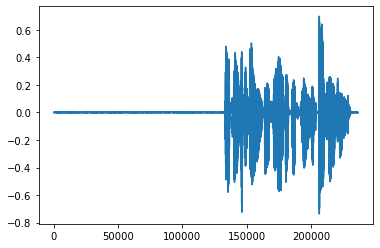

In [46]:
# Two seconds of white noise
# a = torch.rand(1, 1, 2 * promovits.SAMPLE_RATE)
a = promovits.load.audio('/home/mrm5248/promovits/data/cache/daps/0000/000001.wav')
plt.plot(a.squeeze())
ipd.Audio(a.squeeze().numpy(), rate=promovits.SAMPLE_RATE)

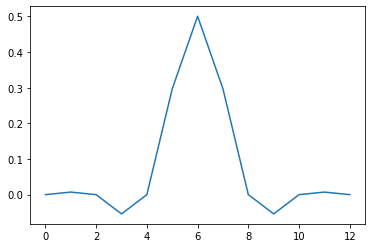

In [53]:
# Snake activation using sinc filter with kaiser window
snake = promovits.model.Snake(1, promovits.SAMPLE_RATE)
plt.plot(snake.kernel_down.squeeze())

/home/mrm5248/conda/envs/promovits/lib/python3.9/site-packages/torch/nn/functional.py:3679: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(


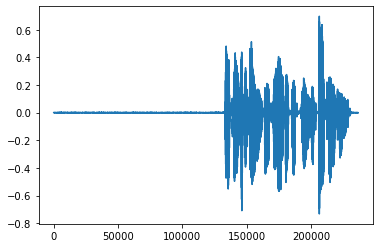

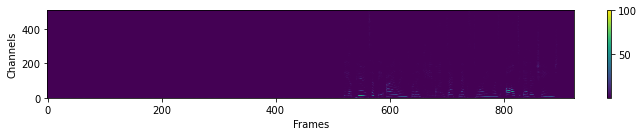

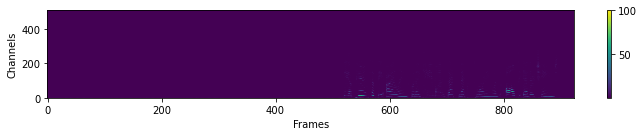

In [54]:
b = snake(a[None]).detach()
plt.plot(b.squeeze())
promovits.plot.spectrogram(promovits.preprocess.spectrogram.from_audio(a)).show()
promovits.plot.spectrogram(promovits.preprocess.spectrogram.from_audio(b)).show()

In [55]:
import torchaudio
torchaudio.save('a.wav', a, promovits.SAMPLE_RATE)
torchaudio.save('b.wav', b[0], promovits.SAMPLE_RATE)

In [56]:
a.min(), a.max()

(tensor(-0.7369), tensor(0.6987))

In [57]:
b.min(), b.max()

(tensor(-0.7327), tensor(0.6976))